In [1]:
import os
import requests
import tarfile
import torch
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import pickle

In [2]:
# def download_cifar10(url, save_path):
#     # Sending a GET request to the URL to start downloading the file
#     response = requests.get(url, stream=True)
#     total_size = int(response.headers.get('content-length', 0))
#     chunk_size = 1024
#     with open(save_path, 'wb') as f:
#         for data in response.iter_content(chunk_size=chunk_size):
#             f.write(data)
#             downloaded_size = os.path.getsize(save_path)
#             progress = 100 * downloaded_size / total_size
#             print('\rDownloading: {:.2f}%'.format(progress), end='', flush=True)
#     print("\nDownload completed!")

# # Download CIFAR-10 dataset
# cifar10_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
# save_path = "./cifar-10-python.tar.gz"
# download_cifar10(cifar10_url, save_path)

In [3]:
# Extracts the CIFAR-10 dataset from the tarball
def extract_cifar10(archive_path, extract_dir):
    with tarfile.open(archive_path, 'r:gz') as tar:
        tar.extractall(extract_dir)
    print("Extraction completed!")

archive_path = "./cifar-10-python.tar.gz"
extract_dir = "./cifar-10-python"
extract_cifar10(archive_path, extract_dir)

Extraction completed!


In [4]:
#converting the device to gpu
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [5]:
def load_cifar10(data_dir):
    images = []
    labels = []
    try:
        for file in os.listdir(data_dir):
            if file.startswith('data_batch') or file.startswith('test_batch'):
                with open(os.path.join(data_dir, file), 'rb') as fo:
                    cifar_data = pickle.load(fo, encoding='bytes')
                    for i, image_data in enumerate(cifar_data[b'data']):
                        # CIFAR-10 images are in CHW format (channels, height, width)
                        # Reshape the image to HWC format (height, width, channels)
                        image = np.transpose(np.reshape(image_data, (3, 32, 32)), (1, 2, 0))
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                        label = cifar_data[b'labels'][i]
                        images.append(image)
                        labels.append(label)
    except Exception as e:
        print("Error loading CIFAR-10 dataset:", e)
    return np.array(images), np.array(labels)


# Function to preprocess images
def preprocess_images(images):
    # Resize images to a fixed size (e.g., 32x32)
    resized_images = [cv2.resize(image, (64, 64)) for image in images]
    processed_images = np.array(resized_images, dtype=np.float32) / 255.0
    return processed_images

data_dir = './cifar-10-python/cifar-10-batches-py'
images, labels = load_cifar10(data_dir)

processed_images = preprocess_images(images)

X_train, X_test, y_train, y_test = train_test_split(processed_images, labels, train_size=0.8, test_size=0.2, random_state=42)

n_classes = len(np.unique(y_train))

n_classes = len(np.unique(y_train))

print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))
print("Image shape:", X_train.shape)
print("Number of classes:", n_classes)

processed_images
labels

Number of training samples: 48000
Number of test samples: 12000
Image shape: (48000, 64, 64)
Number of classes: 10


array([1, 8, 5, ..., 1, 1, 5])

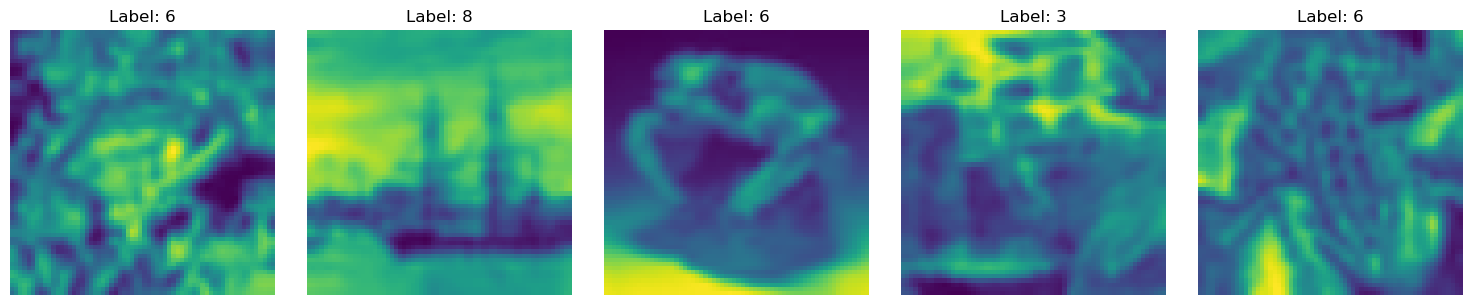

In [6]:
import matplotlib.pyplot as plt

def plot_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title("Label: {}".format(labels[i]))
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

plot_images(X_train[:5], y_train[:5])


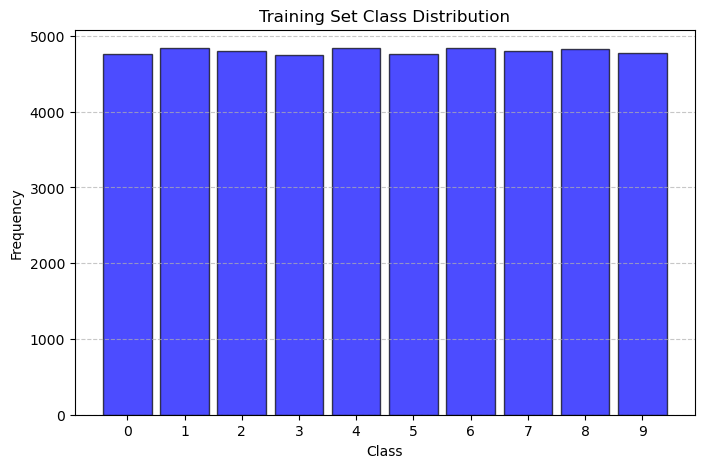

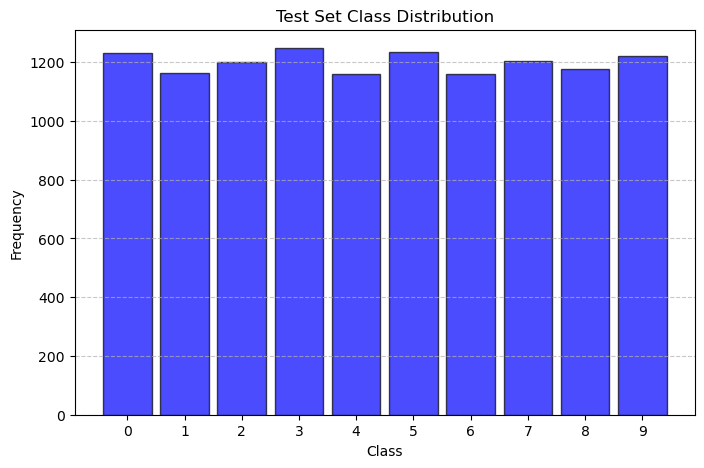

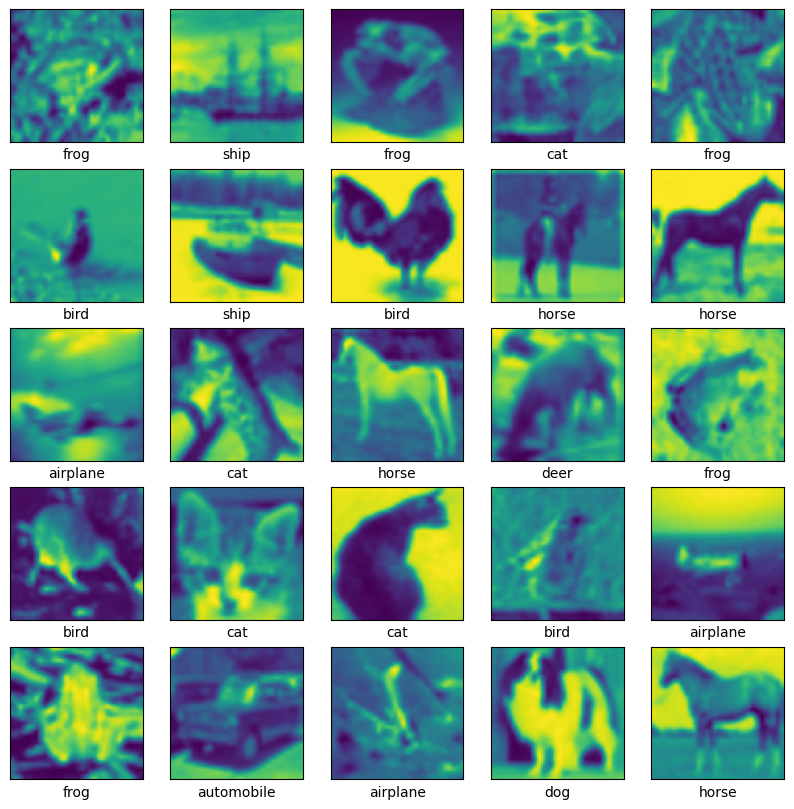

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot class distribution
def plot_class_distribution(labels, title):
    plt.figure(figsize=(8, 5))
    plt.hist(labels, bins=np.arange(11) - 0.5, alpha=0.7, rwidth=0.85, color='blue', edgecolor='black')
    plt.xticks(np.arange(10))
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Function to plot sample images
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Function to visualize data using PCA or t-SNE
def visualize_data(X, y, method='PCA', title=''):
    if method == 'PCA':
        reducer = PCA(n_components=2, random_state=42)
    elif method == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Invalid method. Use 'PCA' or 't-SNE'.")

    X_reduced = reducer.fit_transform(X.reshape(X.shape[0], -1))
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.title(f'{method} Visualization - {title}')
    plt.colorbar()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 1. Plot class distribution
plot_class_distribution(y_train, 'Training Set Class Distribution')
plot_class_distribution(y_test, 'Test Set Class Distribution')

# 2. Plot sample images
plot_sample_images(X_train, y_train, class_names)



In [8]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [9]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)


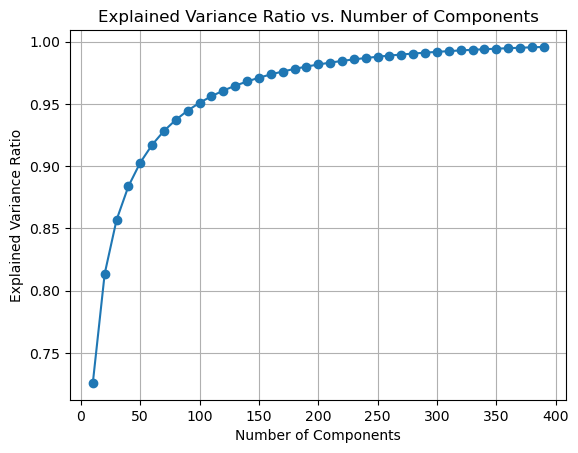

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_variance_ratio(pca):
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs. Number of Components')
    plt.grid(True)
    plt.show()

# Fit PCA with various number of components
n_components_range = range(10, 400, 10)  # Example range, adjust as needed
explained_variance_ratios = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_flat)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot explained variance ratio
plt.plot(n_components_range, explained_variance_ratios, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


In [13]:
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_pca, y_train)

y_pred_pca = knn.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA-transformed test data:", accuracy_pca)


Accuracy on PCA-transformed test data: 0.323


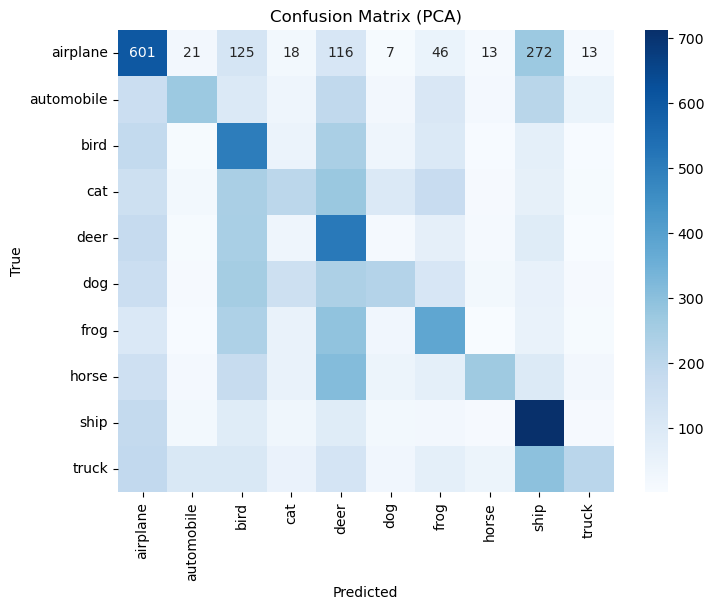

Classification Report:
              precision    recall  f1-score   support

    airplane       0.29      0.49      0.36      1232
  automobile       0.55      0.23      0.33      1164
        bird       0.24      0.42      0.31      1199
         cat       0.30      0.16      0.21      1248
        deer       0.21      0.44      0.29      1161
         dog       0.43      0.18      0.25      1234
        frog       0.33      0.33      0.33      1159
       horse       0.67      0.22      0.33      1204
        ship       0.37      0.60      0.46      1178
       truck       0.62      0.17      0.26      1221

    accuracy                           0.32     12000
   macro avg       0.40      0.32      0.31     12000
weighted avg       0.40      0.32      0.31     12000



In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (PCA)')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_pca, target_names=class_names))


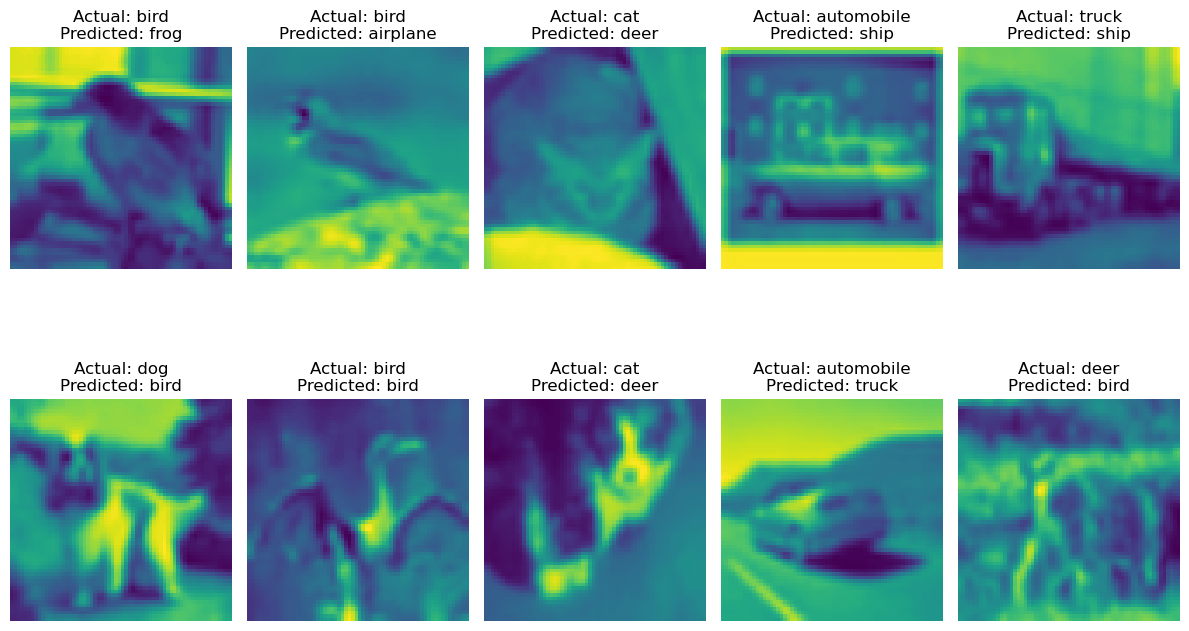

In [18]:
def plot_predicted_actual_images(images, actual_labels, predicted_labels, class_names, num_samples=10):
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i+10])
        actual_label = class_names[actual_labels[i+10]]
        predicted_label = class_names[predicted_labels[i+10]]
        title = f'Actual: {actual_label}\nPredicted: {predicted_label}'
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot some sample images with predicted and actual labels
plot_predicted_actual_images(X_test, y_test, y_pred_pca, class_names)


In [19]:
lda = LinearDiscriminantAnalysis(n_components=n_classes-1)
X_train_lda = lda.fit_transform(X_train_flat, y_train)
X_test_lda = lda.transform(X_test_flat)

In [20]:
knn.fit(X_train_lda, y_train)

y_pred_lda = knn.predict(X_test_lda)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy on LDA-transformed test data:", accuracy_lda)


Accuracy on LDA-transformed test data: 0.21741666666666667


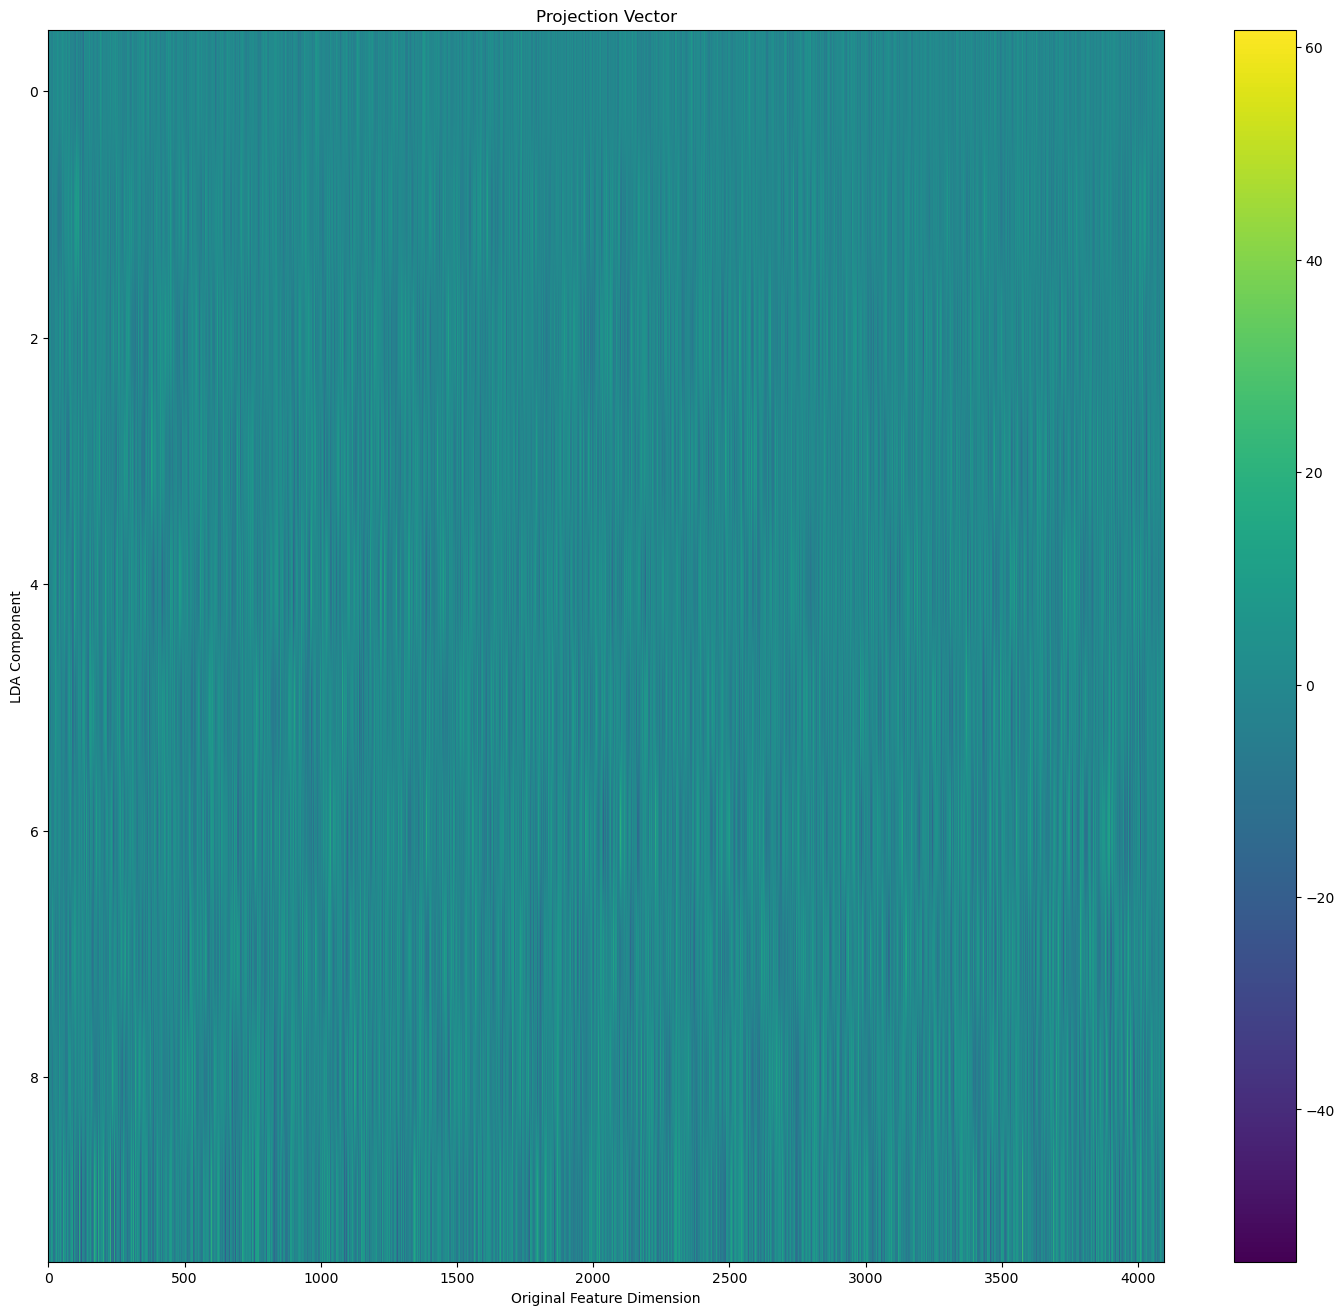

In [26]:
projection_vector = lda.scalings_

# Visualize the projection vector
plt.figure(figsize=(18, 16))
plt.imshow(projection_vector.T, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Projection Vector')
plt.xlabel('Original Feature Dimension')
plt.ylabel('LDA Component')
plt.show()

In [27]:
nb= GaussianNB()
nb.fit(X_train_flat, y_train)

GaussianNB()

In [28]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_flat, y_train)
X_test_lda = lda.transform(X_test_flat)
nb_lda = GaussianNB()
nb_lda.fit(X_train_lda, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)
svm_clf = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
svm_clf.fit(X_train_scaled, y_train)

SVC()

In [ ]:
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train_flat, y_train)

In [ ]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flat, y_train)

random_forest = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest.fit(X_train_flat, y_train)

decision_tree = DecisionTreeClassifier(max_depth = 20, random_state=42)
decision_tree.fit(X_train_flat, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_pca, y_train)

y_pred_pca = knn.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA-transformed test data:", accuracy_pca)


knn.fit(X_train_lda, y_train)

y_pred_lda = knn.predict(X_test_lda)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy on LDA-transformed test data:", accuracy_lda)


y_pred_nb = nb.predict(X_test_flat)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

y_pred_nb_lda = nb_lda.predict(X_test_lda)
accuracy_nb_lda = accuracy_score(y_test, y_pred_nb_lda)
print("Naive Bayes for LDA Accuracy:", accuracy_nb_lda)

y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

In [ ]:
y_pred = log_reg.predict(X_test_flat)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

y_pred_rf = random_forest.predict(X_test_flat)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

y_pred_dt = decision_tree.predict(X_test_flat)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


In [ ]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        self.flatten = nn.Flatten()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

model = SimpleClassifier(num_inputs=4096, num_hidden=1000, num_outputs=10)
model.to(device)

BATCH_SIZE = 32

train_dataset = data.TensorDataset(torch.tensor(X_train_flat, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

X_train_pca_tensor = torch.tensor(X_train_pca)
y_train_tensor = torch.tensor(y_train)

train_dataset_pca = data.TensorDataset(X_train_pca_tensor, y_train_tensor)
train_dataloader_pca = DataLoader(train_dataset_pca, batch_size=BATCH_SIZE, shuffle=True)

loss_fn = nn.CrossEntropyLoss()

# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.026)

def accuracy_fn(y_true, y_pred):
 
    correct = (y_true == y_pred).sum()

    # Calculate the accuracy
    accuracy = correct / len(y_true)

    return accuracy

def train_model(model, optimizer, data_loader, loss_fn, num_epochs=100):
    # Set model to train mode
    model.to(device)
    model.train()
    train_loss, train_acc = 0, 0

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_inputs = data_inputs.to(torch.float32)
            data_labels = data_labels.to(device).to(torch.int64)
            
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            y = data_labels
            loss = loss_fn(preds, y)
            train_loss += loss
            train_acc += accuracy_fn(y_true=y,y_pred=preds.argmax(dim=1))


            ## Step 3: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 4: Update the parameters
            optimizer.step()
    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

train_model(model, optimizer, train_data_loader, loss_fn)

test_dataset = data.TensorDataset(torch.tensor(X_test_flat, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

X_test_pca_tensor = torch.tensor(X_test_pca)
y_test_tensor = torch.tensor(y_test)

test_dataset_pca = data.TensorDataset(X_test_pca_tensor, y_test_tensor)
test_dataloader_pca = DataLoader(test_dataset_pca, batch_size=BATCH_SIZE, shuffle=False)

def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    test_loss, test_acc = 0, 0

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            y = data_labels
            data_inputs = data_inputs.to(torch.float32)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            test_loss += loss_fn(preds, y)
    
            test_acc += accuracy_fn(y_true=y,y_pred=preds.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc*100:.2f}%\n") 
    

eval_model(model, test_data_loader)

In [ ]:
class ObjectRecognition(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, hidden_units1: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(in_features=hidden_units, out_features=hidden_units1),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = x.to(torch.float32)
        return self.layer_stack(x)

    
model_1 = ObjectRecognition(input_shape=150, hidden_units=256,hidden_units1=128, output_shape=10)
model_1.to(device)
 

model_2 = ObjectRecognition(input_shape=4096, hidden_units=1024,hidden_units1=512, output_shape=10)
model_2.to(device)



In [ ]:
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=0.10)
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=0.001) 

In [ ]:
epochs = 1
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    
    train_model(model=model_1,optimizer=optimizer_1,data_loader=train_dataloader_pca,loss_fn=loss_fn)
    
    eval_model(model=model_1,data_loader=test_dataloader_pca)


In [ ]:
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    
    train_model(model=model_2,optimizer=optimizer_2,data_loader=train_data_loader,loss_fn=loss_fn)
    
    eval_model(model=model_2,data_loader=test_data_loader)